In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("superconductivty+data/train.csv")

X_svr = df.drop(columns=['critical_temp'])
y_svr = df['critical_temp']

X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size=0.2, random_state=42)


In [13]:
scaler_svr = StandardScaler()
X_train_svr_scaled = scaler_svr.fit_transform(X_train_svr)
X_test_svr_scaled = scaler_svr.transform(X_test_svr)


In [14]:
svr = SVR(kernel='rbf', C=100, epsilon=0.2)  
svr.fit(X_train_svr_scaled, y_train_svr)


SVR(C=100, epsilon=0.2)

In [15]:
y_pred_svr = svr.predict(X_test_svr_scaled)

mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)

print(f"R² Score: {r2_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")

R² Score: 0.8536
MAE: 7.5594
RMSE: 12.9814


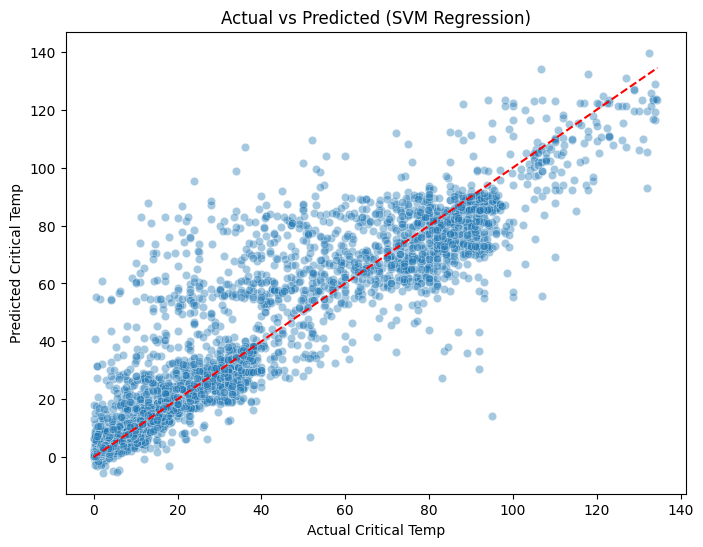

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_svr, y=y_pred_svr, alpha=0.4)
plt.plot([y_test_svr.min(), y_test_svr.max()], [y_test_svr.min(), y_test_svr.max()], 'r--')
plt.xlabel("Actual Critical Temp")
plt.ylabel("Predicted Critical Temp")
plt.title("Actual vs Predicted (SVM Regression)")
plt.show()


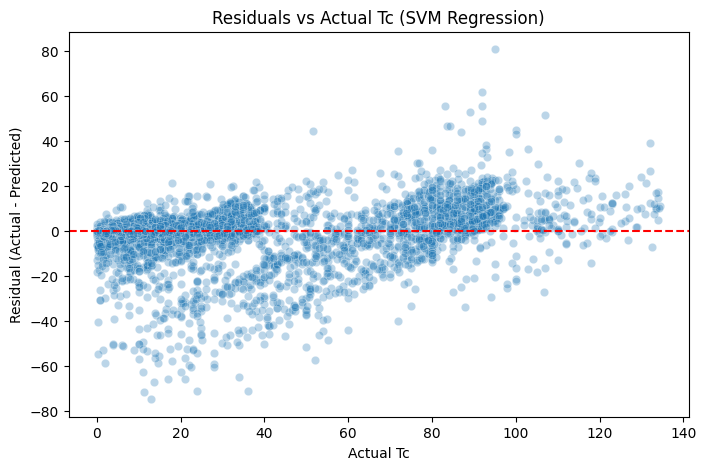

In [17]:
residuals = y_test_svr - y_pred_svr
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_svr, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actual Tc (SVM Regression)")
plt.xlabel("Actual Tc")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()


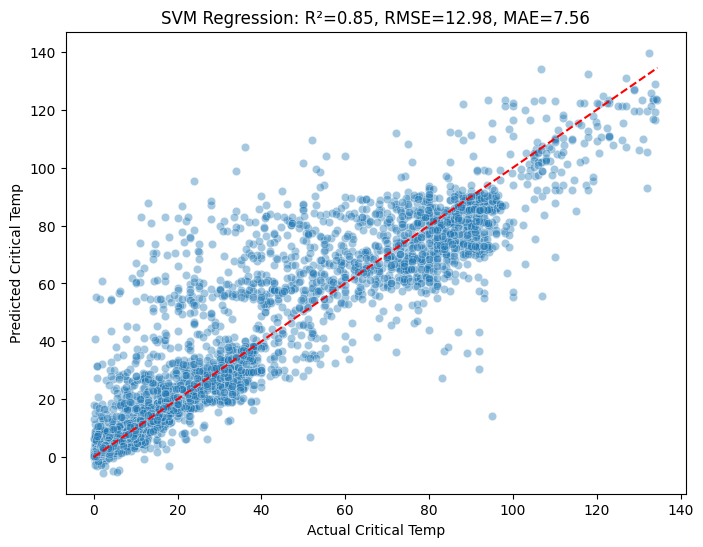

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_svr, y=y_pred_svr, alpha=0.4)
plt.plot([y_test_svr.min(), y_test_svr.max()], [y_test_svr.min(), y_test_svr.max()], 'r--')
plt.xlabel("Actual Critical Temp")
plt.ylabel("Predicted Critical Temp")
plt.title(f"SVM Regression: R²={r2_svr:.2f}, RMSE={rmse_svr:.2f}, MAE={mae_svr:.2f}")
plt.show()


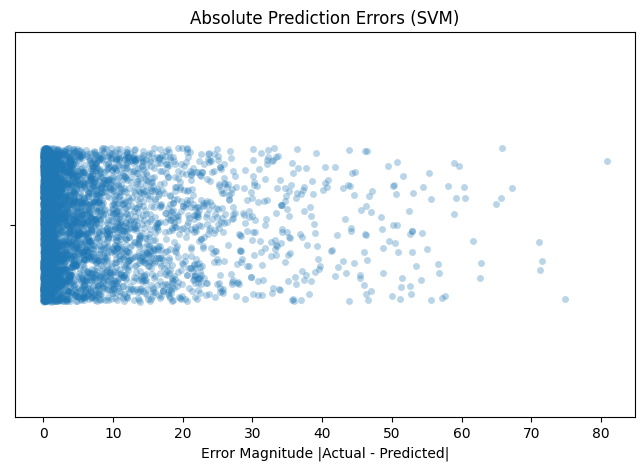

In [19]:
plt.figure(figsize=(8,5))
sns.stripplot(x=np.abs(residuals), alpha=0.3, jitter=0.2)
plt.title("Absolute Prediction Errors (SVM)")
plt.xlabel("Error Magnitude |Actual - Predicted|")
plt.show()


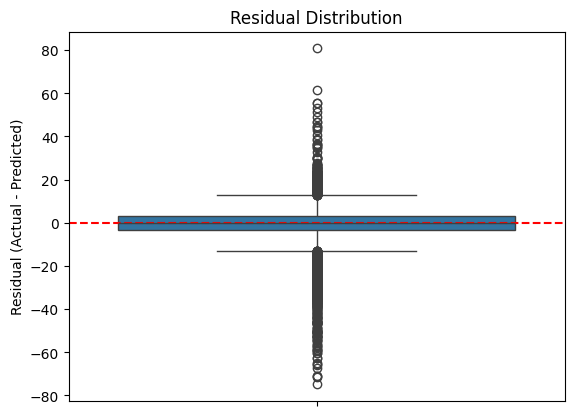

In [20]:
sns.boxplot(y=residuals)
plt.title("Residual Distribution")
plt.ylabel("Residual (Actual - Predicted)")
plt.axhline(0, color='red', linestyle='--')
plt.show()